## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [72]:
import pandas as pd
import numpy as np
import random
import statsmodels.formula.api as smf
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [73]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [74]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [75]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [76]:
proportion_converted = df[df.converted == 1].user_id.count()/df.shape[0]*100

print("The proportion of users converted is {} %.".format(proportion_converted))

The proportion of users converted is 11.96591935560551 %.


e. The number of times the `new_page` and `treatment` don't match.

In [77]:
no_match = (df[(df.landing_page == 'new_page') & (df.group == 'control')].shape[0] 
+ df[(df.landing_page == 'old_page') & (df.group == 'treatment')].shape[0])

print("The number of times the new_page and treatment don't match is {}.".format(no_match))

The number of times the new_page and treatment don't match is 3893.


f. Do any of the rows have missing values?

In [78]:
missing_rows = df.isnull().any(axis = 1).sum()

print('Number of rows with missing vaule is {}.'.format(missing_rows))

Number of rows with missing vaule is 0.


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [79]:
# The rows where treatment does not match with new_page or control does not match with old_page
df2 = df.query('group == "treatment" and landing_page =="new_page" or group == "control" and landing_page =="old_page"')

In [80]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [81]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [82]:
# duplicated user_id

df2[df2.user_id.duplicated(keep= False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

**The repeat user_id is 773192 with same row information.**

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [83]:
# Remove one duplicated user_id
df2.drop_duplicates(subset = 'user_id', keep = 'first')


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [84]:
# The probability of an individual converting regardless of the page they receive
individual_conversion_prob = df2.converted.mean()
print("The probability of an individual converting regardless of the page they receive is {}.".format(individual_conversion_prob))

The probability of an individual converting regardless of the page they receive is 0.11959667567149027.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [85]:
# The probablity of an individual converted within control group
control_converted = df2[(df2.group == 'control') & (df2.converted == 1)].user_id.count()/df2[(df2.group == 'control')].converted.count()

print('The probability of an dividual from control group converted is {}.'.format(control_converted))

The probability of an dividual from control group converted is 0.1203863045004612.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [86]:
#The probability of an individual converted within treatment group

treatment_converted = df2[(df2.group == 'treatment') & (df2.converted == 1)].user_id.count()/df2[(df2.group =='treatment')].converted.count()

print('The probability of an dividual from treatment group converted is {}.'.format(treatment_converted))

The probability of an dividual from treatment group converted is 0.11880724790277405.


d. What is the probability that an individual received the new page?

In [87]:
# The probability of an individual receiving new page

new_page_received = df2[(df2.landing_page == 'new_page')].user_id.count()/df2.landing_page.count()

print('The probability that an individual received the new page is {}.'.format(new_page_received))

The probability that an individual received the new page is 0.5000636646764286.


In [88]:
# Difference in the probability between two groups where individual converted 
diff = treatment_converted - control_converted
diff

-0.0015790565976871451

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The results above on probablity do not suggest that there is any significant difference between the control group and treatment group. The probability of an individual received the new page is 50% and the difference between treatment and control groups' conversion rate is only 0.0015%. So, we can not really say that the new treatment page leads to more conversions. To strengthen our initial findings, we need to do A/B test. We will be able to extract if there is any significant difference in case of conversion rate between two groups.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$ 
​	 :$p_{new}$ 
​	 ≤$p_{old}$

$H_{1}$
​	 :$p_{new}$ 
​	 >$p_{old}$ 



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [89]:
p_new = individual_conversion_prob
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [90]:
p_old = individual_conversion_prob
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [91]:
n_new = df2[(df2.landing_page == 'new_page') & (df2.group == 'treatment')].user_id.count()
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [92]:
n_old = df2[(df2.landing_page == 'old_page') & (df2.group == 'control')].user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [93]:
new_page_converted = np.random.binomial(1,p_new, n_new)
new_page_converted

array([1, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [94]:
old_page_converted = np.random.binomial(1,p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [95]:
p_diffs = new_page_converted.mean() - old_page_converted.mean()
p_diffs

8.6619127294407239e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [96]:
# Sampling distribution of the difference of the means of conversions for old page and new page
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old 
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

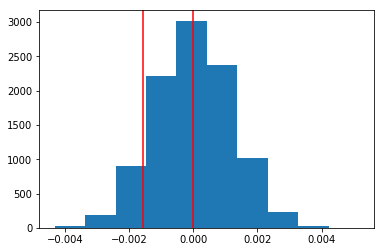

In [97]:
# Convert to numpy array
p_diffs = np.array(p_diffs)
# Plot sampling distribution with null mean of 0 as the center
plt.hist(p_diffs)
plt.axvline(0, color='red')
plt.axvline(diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [98]:
# Proportion of p_diffs greater than the actual difference observed in part I
(p_diffs>diff).mean()

0.9042

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We have computed the p-value to answer the question j under the null hypothesis (pnew - pold =0 in this case).This was calculated from the sampling distribution of the difference of means which in this case is same as the sampling distribution under the null hypothesis as it is centered at 0 and has the same spread. Also if we look at the p-value(0.90) which is greater than alpha = 0.05, we fail to reject the null hypothesis. Since we fail to reject the null hypothesis, there is no statistically significant reason to implement the new page for better business outcome.**


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [99]:
import statsmodels.api as sm

# The number of conversions for each page
convert_old = df2[(df2.landing_page == 'old_page') & (df2.converted == 1)].converted.count()
convert_new = df2[(df2.landing_page == 'new_page') & (df2.converted == 1)].converted.count()
n_old = n_old 
n_new = n_new 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [100]:
# compute z-score and p-value for one tailed test using stats.proportions_ztest 
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3116075339133115, 0.90517370514059103)

In [101]:
# how significant our z-score is
print("Significance of z-score is {}.".format(norm.cdf(z_score)))

# our critical value at 95% confidence is
print("The critical value is {}".format(norm.ppf(1-(0.05/2))))

Significance of z-score is 0.09482629485940902.
The critical value is 1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since the z-score of -1.31 is less than the critical value of 1.959963984540054, we fail to reject the null hypothesis.There is no difference between the two proportions and they are equal to the converted rate in ab_data.csv regardless of the page.**

**This is perfectly aligned with our previous findings in parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should be performing logistic regression since we have binomial(true or false) variable as the dependent variable (conversion) here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [102]:
# Create dummy variables for the group variable
df2[['page','ab_page']]= pd.get_dummies(df2['group'])

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [103]:
# Dropping the page dummy variables as ab_page gives the same information
df2=df2.drop('page', axis=1)

In [104]:
# Add intercept to the data 
df2['intercept']=1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [105]:
# Instantiate the logistic regression model
logit_model=sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
#fit the model
results=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [106]:
# Get the summary
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-10 01:30 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

In [107]:
# The estimated coefficients are the log odds. By exponentiating these values,we can calculate 
# the odds which are easier to interpret. And since the coefficient is negative, we invert the odds ratio to find the relation 
# between conversion rate and the ab_page(see reference below for more details)
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?


**The P value associated with the ab_page is 0.190, which is greater than the alpha value of 0.05. Hence, we fail to reject the null hypothesis here.**

**For the logistic regression the null hypothesis is that there is no relationship between the landing page and conversion rate. Therfore, no difference exists in conversion rate based on the page or 
$p_{new}$ - $p_{old}$ = 0**

**The alternate hypothesis is that there is a relation between them.In other words, $p_{new}$ - $p_{old}$ ≠ 0 . The above hypotheses drive us to two tail test and hence, we see a different p value than that of part II where we had the alternate hypothesis as $p_{new}$ > $p_{old}$.**

**If we look at the coefficient of ab_page, the conversion rate for the old page is 1.015 times of the new page. Not enough significant to go for alternate hypothesis. Therefore we stick to our proposition of failing to reject the null hypothesis.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding more than one explanatory variable to the regression model helps us to determine the relative influence of more than one predictor variables have on the response. This multiple logistic regression might help to get insights those are not possible just from single logistic regression. Such as we can see if certain landing pages lead to more conversion for certain countries or certain times of the day or week that would not be possible with just the landing page variable. It also helps to identify outliers in the sample data.**

**Adding additional terms to the model has the disadvantage as well. Instead of increasing the quality of the model it could also decrease.Incomplete or complex data can leads to concluding of an incorrect relationship between the variables.Therfore, it could navigate to falsely concluding that correlation is a causation.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [108]:
# Read the countries.csv dataset 
countries_df = pd.read_csv('./countries.csv')

countries_df.head()



,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [109]:
# Check the total count of different countries
countries_df.groupby('country').count()

,user_id
country,
CA,14499
UK,72466
US,203619


In [110]:
# Merge with ab_data.csv dataset based on the user_id column
new_df = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

Since there are three different countries, we have to create dummy variables and then fit a model to calculate the p value to figure out the relationship among the variables. 

In [111]:
# Create the dummy variables
new_df[['ca', 'uk', 'us']] = pd.get_dummies(new_df['country'])

In [112]:
new_df.head(5)

,country,timestamp,group,landing_page,converted,ab_page,intercept,ca,uk,us
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1


In [113]:
# Logistic regression with the ab_page and countries (UK as the baseline)
logit_model_1 = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'us', 'ca']])
results_1=logit_model_1.fit()
results_1.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-10 01:30 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4143  0.0000  -2.0043  -1.9544
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
us           -0.0099    0.0133    -0.7437  0.4570  -0.0359   0.0162
ca           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
==================================================================

"""

In [114]:
# Odds ratio
np.exp(results_1.params)

intercept    0.138154
ab_page      0.985160
us           0.990160
ca           0.950621
dtype: float64

**We find conversion rate is not influenced by countries or different landing page. From the coefficient of US we can say that the conversion rate for US is 0.99 times of CA holding all other variables constant. From the coefficient of UK we can say that the conversion rate of UK is 0.95 times of CA holding all other variables constant. None of the predictors are statistically significant.**

**The p values calculated at this step(0.074-0.45) are higher than 0.05 which certainly holds us to not reject the null hypothesis. Therefore, we do not have enough eveidence to say that newer page should be implemented.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [115]:
# Find the interaction terms
new_df['page_us'] = new_df.ab_page * new_df.us
new_df['page_ca'] = new_df.ab_page * new_df.ca


In [116]:
# Logistic regression with the ab_page and countries (UK as the baseline)
logit_model_2 = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'us', 'ca','page_us','page_ca']])
results_2=logit_model_2.fit()
results_2.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-10 01:30 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
us            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
ca           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
page_us      -0.0314    0.0266    -1.1811  0.2375  -0.0835   0.0207
page_ca      -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
==================================================================

"""

In [117]:
#Odds ratio
np.exp(results_2.params)


intercept    0.136392
ab_page      1.010893
us           1.005761
ca           0.988285
page_us      0.969079
page_ca      0.924703
dtype: float64

**For logistic regression we also see that the p values(0.168-0.76) are greater than 0.05. So the tested X variables (landing_page and country) or their interaction terms didn't have any effect on the model. So we fail to reject the null hypothesis with no evidence of relationship between the response and predictor variables.This scenario is not ideal to let us conclude that newer page is better than old page.**

## Effect of time on Conversion

**For additional analysis, we will add different timeslot such as weekday/weekend or various periods during a day (morning, afternoon, evening) as another variable. It will assist us to understand the relationship associated with time on conversion if there is any.**

In [118]:
# Create a 'day of week' column from timestamp column (Sunday = 6,..)

new_df['day_of_week'] = pd.to_datetime(new_df['timestamp']).dt.dayofweek


In [119]:
# Convert weekday to 1 and weekend to 0
new_df['day_of_week'] = (new_df['day_of_week'] < 5).astype(int)

In [120]:
new_df.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,ca,uk,us,page_us,page_ca,day_of_week
user_id,,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,0,0,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,1,0,1


In [121]:
# Create a 'hour' column converting the hour and minute in decimal from timestamp

new_df['hour'] = pd.to_datetime(new_df['timestamp']).dt.hour + pd.to_datetime(new_df['timestamp']).dt.minute/60

In [122]:
# Create a 'session' column based on the hour calculated in previous step


b = [0,5,12,18]
l = ['Morning','Afternoon','Evening']
new_df['session'] = pd.cut(new_df['hour'], bins=b, labels=l, include_lowest=True)

def f(x):
    if (x >= 5) and (x <= 12):
        return 'Morning'
    elif (x > 12) and (x <= 18 ):
        return 'Afternoon'
    else:
        return'Evening'

new_df['session'] = new_df['hour'].apply(f)


In [123]:
new_df.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,ca,uk,us,page_us,page_ca,day_of_week,hour,session
user_id,,,,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,1,0,1,6.433333,Morning
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,1,0,1,3.266667,Evening
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,0,0,1,0,0,1,19.333333,Evening
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,1,0,1,10.150000,Morning
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,1,0,1,20.383333,Evening


In [124]:
# Create the necessary dummy variables for time aspect
new_df[['evening','afternoon', 'morning']]= pd.get_dummies(new_df['session'])

In [125]:
new_df.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,ca,uk,us,page_us,page_ca,day_of_week,hour,session,evening,afternoon,morning
user_id,,,,,,,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,1,0,1,6.433333,Morning,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,1,0,1,3.266667,Evening,0,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,0,0,1,0,0,1,19.333333,Evening,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,1,0,1,10.150000,Morning,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,1,0,1,20.383333,Evening,0,1,0


In [126]:

# Create the interaction terms with time and day of week
new_df['page_day_of_week'] = new_df.ab_page * new_df.day_of_week
new_df['page_afternoon'] = new_df.us * new_df.afternoon
new_df['page_morning'] = new_df.us * new_df.morning

In [127]:
# Create the logistic model and fit it.
logit_model_3 = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'us', 'ca','page_us','page_ca','day_of_week','page_day_of_week','morning','afternoon','page_afternoon','page_morning']])
results_3=logit_model_3.fit()
results_3.summary2()

Optimization terminated successfully.
         Current function value: 0.366098
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-10 01:30 AIC:              212789.2978
No. Observations:   290585           BIC:              212916.2536
Df Model:           11               Log-Likelihood:   -1.0638e+05
Df Residuals:       290573           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept         -1.9657   0.0275 -71.3911 0.0000 -2.0196 -1.9117
ab_page           -0.0198   0.0294  -0.6735 0.5006 -0.0775  0.0378
us                 0.0024   0.0286   0.0828 0.9340 -0.0538  0.0585
ca                -0.0116   0.0398  -0.2917 0.7705 -0.0897  0.0665
page_us           -0.0314   0.0266  -1.1819 0.2373 -0.0836  0.0207
page_ca           -0.0785   0.0568  -1.3818 0.1670 -0.1898  0.0328
day_of_week       -0.0214   0.0180  -1.1890 0.2344 -0.0567  0.0139
page_day_of_week   0.0422   0.0256   1.6459 0.0998 -0.0081  0.0925
morning           -0.0040   0.0283  -0.1426 0.8866 -0.0596  0.0515
afternoon         -0.0217   0.0260  -0.8364 0.4029 -0.0727  0.0292
page_afternoon     0.0035   0.0310   0.1118 0.9110 -0.0574  0.0643
page_morning       0.0062   0.0339   0.1831 0.8547 -0.0602  0.0726
==================================================================

"""

In [128]:
# Odds ratios and 95% Confidence interval
params = results_3.params
conf = results_3.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
intercept,0.132705,0.147830,0.140063
ab_page,0.925465,1.038564,0.980385
us,0.947662,1.060246,1.002375
ca,0.914186,1.068731,0.988443
page_us,0.919844,1.020908,0.969059
page_ca,0.827113,1.033384,0.924514
day_of_week,0.944898,1.013973,0.978827
page_day_of_week,0.991980,1.096870,1.043107
morning,0.942141,1.052866,0.995966
afternoon,0.929864,1.029648,0.978485


**The p values(0.16-0.93) above in the table(from results_3 summary) are higher than our threshold value of 0.05.This is a strong base to conclude that we fail to reject our null hypothesis meaning no significant relationship among the pages and the conversion rate. The interaction terms were included to explore further association in case of converstion. Those also did not express sufficient evidence in favor of alternate hypothesis.**

**The co-efficicent values calculated(0.92-1.04) provide not so significant of value on increasing a single unit of a variable holding other variables constant.So, the effect of location, page type, session of day or weekday/ weekend have not shown any noticeable effect on conversion.**


**A negetive log-likelihood indicates not a good overall fit of the model while the value close to zero means a overall goot fit. So,our results infer that the model didn't fit the data well.** 





## Conclusions

* From above data analysis for all three parts and results(Probablity,A/B testing,Regression Approach) we can advise the company in general that there is not really strong evidence or reason for leaning toward new page implementation. 

* In reality, we are lacking many other information about new page quality (i.e. any attractive feature added or not could be an option to see the effect) which really benefits the end users to go for it. Also adding other variables such as data about users themselves or duration of their visit could bring insights on conversion rate from old page to new one. 
* We also do not have any revenue data(expense on implementing new page vs. revenue on increasing traffic) which could be ultimate importatnt factor behind the changes. So at this point, we have to maintain old page based on current data analysis.
* The sample is size is large enough for both the pages, so we are good on that part. For future analysis, we should go for individual statistics to attain better accuracy of our findings( may be applying the machine learning techniques can assist).**

## References

* https://www.juanshishido.com/logisticcoefficients.html
* https://knowledge.udacity.com/questions/32164
* https://knowledge.udacity.com/questions/85053
* https://knowledge.udacity.com/questions/96294
* http://joelcarlson.github.io/2016/05/10/Exploring-Interactions/
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
* https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/
* https://stackoverflow.com/questions/32278728/convert-dataframe-date-row-to-a-weekend-not-weekend-value
* http://blog.yhat.com/posts/logistic-regression-python-rodeo.html


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [129]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0